In [66]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [75]:
path = '/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/safe/*.jpg'
files = glob.glob(path)

In [76]:
imagem = np.random.choice(files)
# imagem = '/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/nude/E02A9E4B-1A66-4943-8A96-914ACC566F45.jpg'
imagem

'/mnt/d/NUDENET/NudeNet_classifier_dataset_v1/nude_sexy_safe_v1_x320/testing/safe/630E2A3C-9191-4320-87C7-D0E8FF5E0812.jpg'

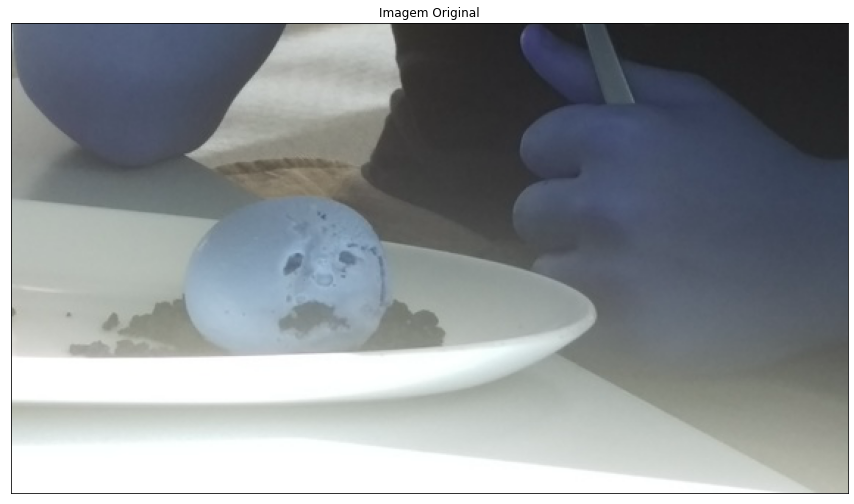

In [77]:
original_image = cv2.imread(imagem)

figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(original_image)
plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.show()

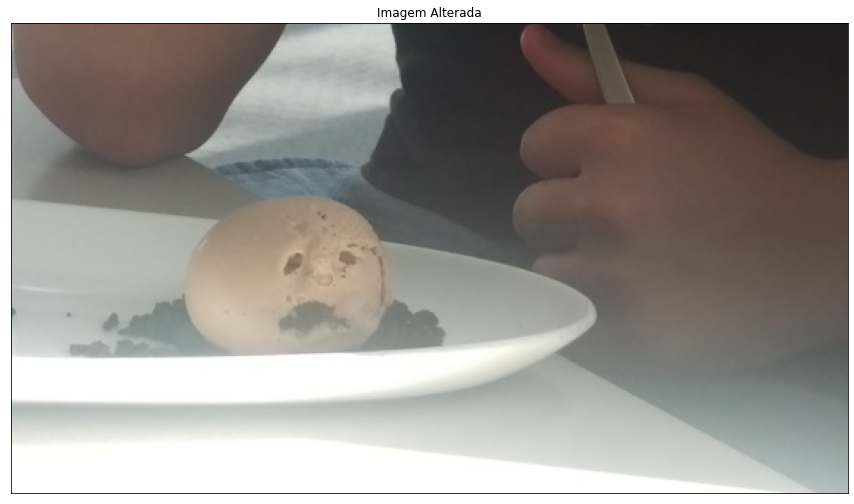

In [78]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(img)
plt.title('Imagem Alterada')
plt.xticks([]), plt.yticks([])
plt.show()

In [79]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [80]:
def aplica(K=3, attempts=10):
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))

    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),
    plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),
    plt.imshow(result_image)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()


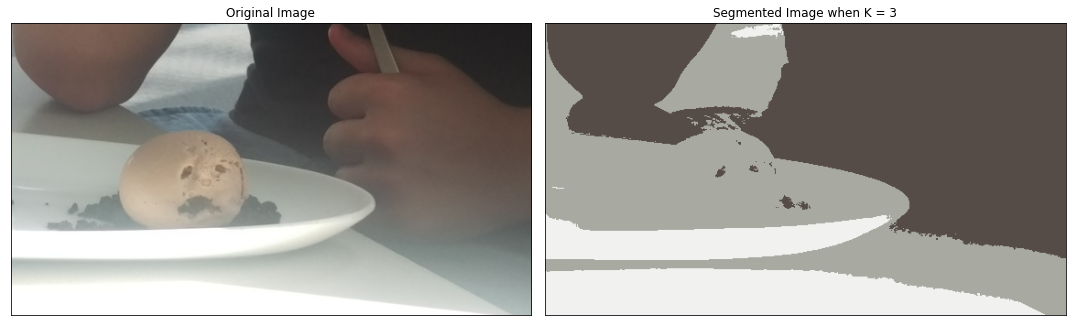

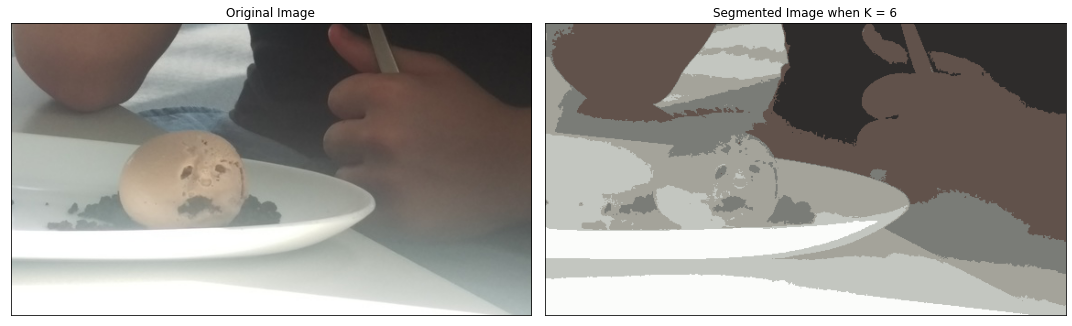

In [81]:
for k in range(3, 7, 3):
    aplica(k)

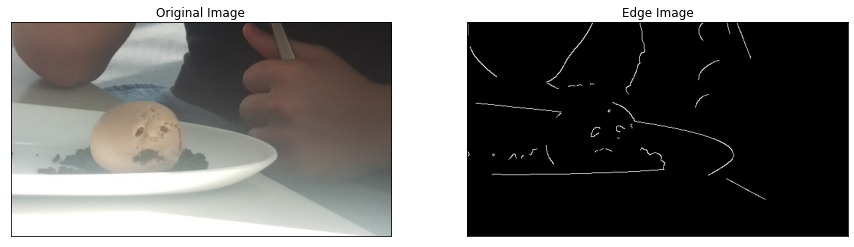

In [82]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()